In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

### Import data

In [2]:
data = pd.read_json('data/data.json')

### Convert 'acct_type' to Target Labels based on presence of word "fraud"

In [3]:
data['Label'] = np.where(data['acct_type'].str.contains('fraud'), 1, 0)

In [4]:
data.head(1)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Label
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums/qq49/digusonline/?action=view&amp;current=supersunday.jpg"" target=""_blank""><img src=""http://i432.photobucket.com/albums/qq49/digusonline/supersunday.jpg"" border=""0"" alt=""Photobucket"" /></a></p>\r\n<p> </p>\r\n<p style=""text-align: center;""><font siz...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.0,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEND GRAND FINALE",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availability': 1, 'quantity_total': 800, 'quantity_sold': 0}, {'event_id': 527017, 'cost': 50.0, 'availability': 1, 'quantity_total': 100, 'quantity_sold': 0}, {'event_id': 527017, 'cost': 550.0, 'availability': 1, 'quantity_total': 20, 'quantity_sold': 0}]",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1


### Define replace function for handling missing (non-NaN) data

In [5]:
def replace(row):
    if len(row) < 1:
        return "UNK"
    else: return row

In [6]:
data['payout_type'] = data['payout_type'].apply(replace)
data['country'].fillna('UNK', inplace=True)
data['country'] = data['country'].apply(replace)
data['venue_state'].fillna('UNK', inplace=True)
data['venue_state'] = data['venue_state'].apply(replace)

### Separate datasets into fraud and non-fraud for some visual EDA

In [7]:
fraud = data[data['Label'] == 1]
nonfraud = data[data['Label'] == 0]

### Define columns for histogram plots

In [8]:
cols = [
    'acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_facebook', 'org_twitter',
       'payee_name', 'payout_type', 'sale_duration',
       'sale_duration2', 'show_map', 'user_age',
       'user_created', 'user_type',  'venue_country', 'venue_state'
]

In [9]:
def hist_plots(fraud_df, nonfraud_df, column):
    plt.hist(nonfraud_df[column], label="Class #0", alpha=0.5, edgecolor='black', lw=1.5, color='blue')
    plt.hist(fraud_df[column], label="Class #1", alpha=0.5, edgecolor='black', linewidth=1.5, color='r')
    plt.title(column, fontsize=34)
    plt.legend(fontsize='xx-large')
    return plt.show()

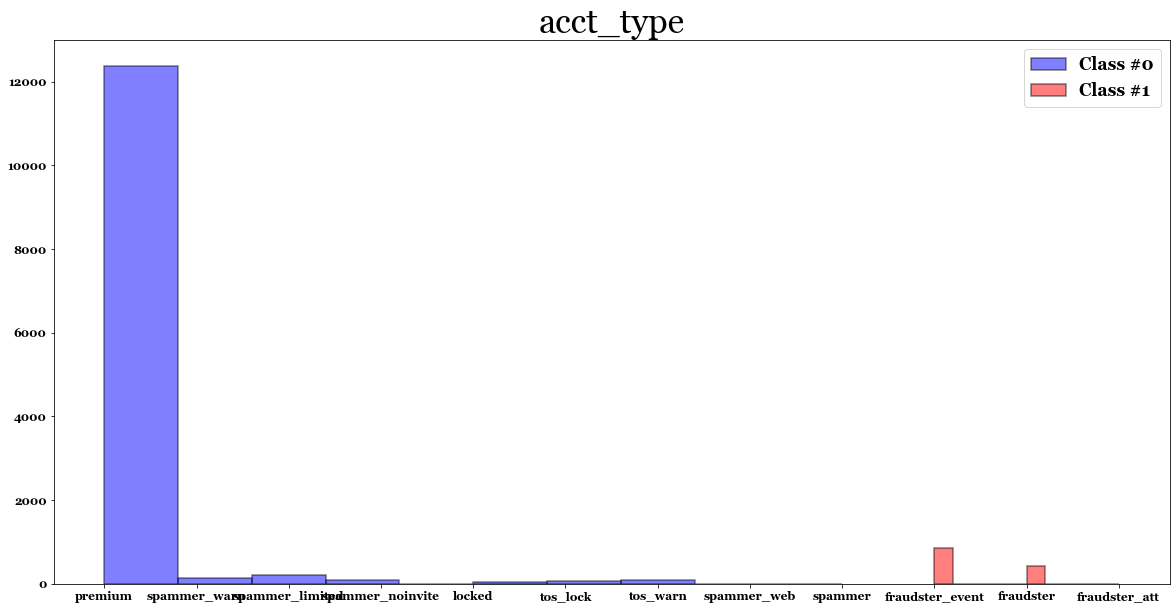

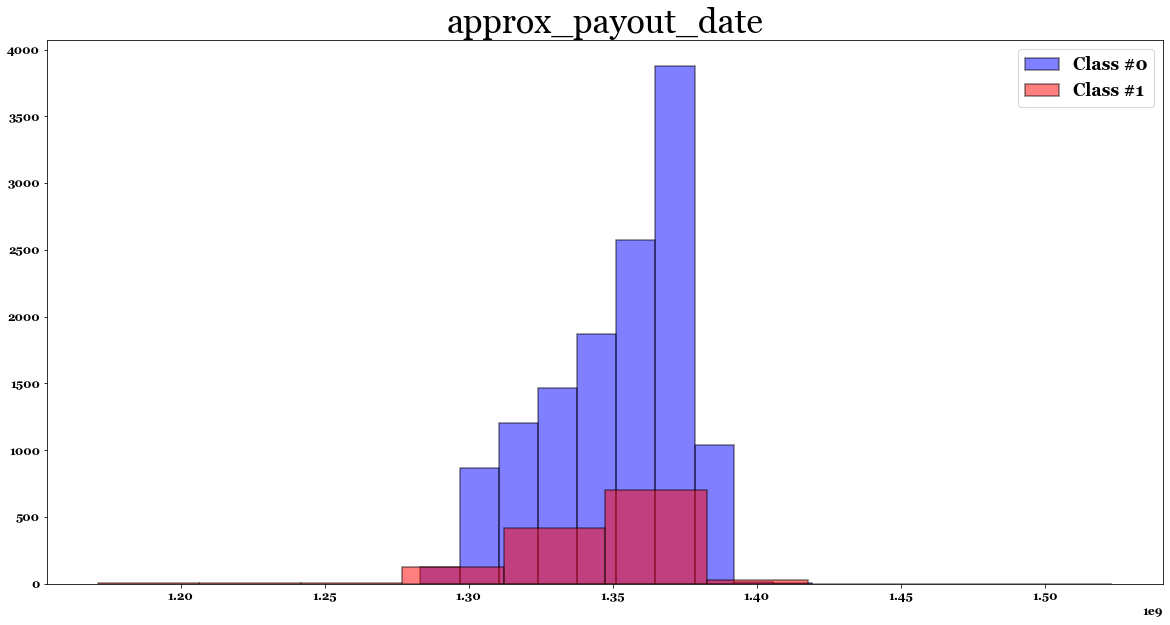

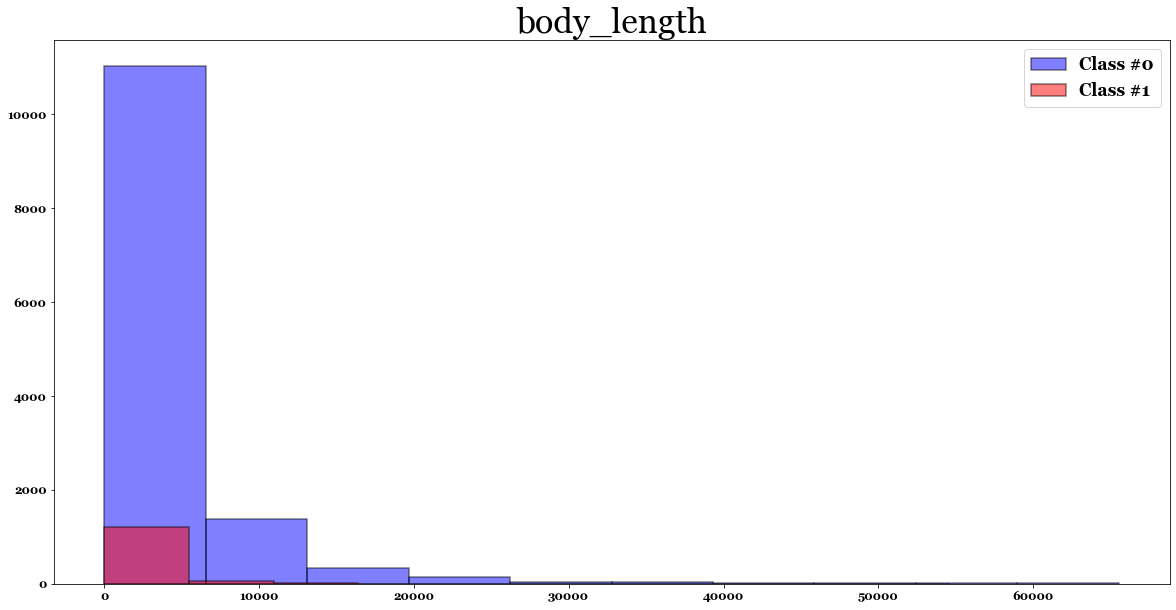

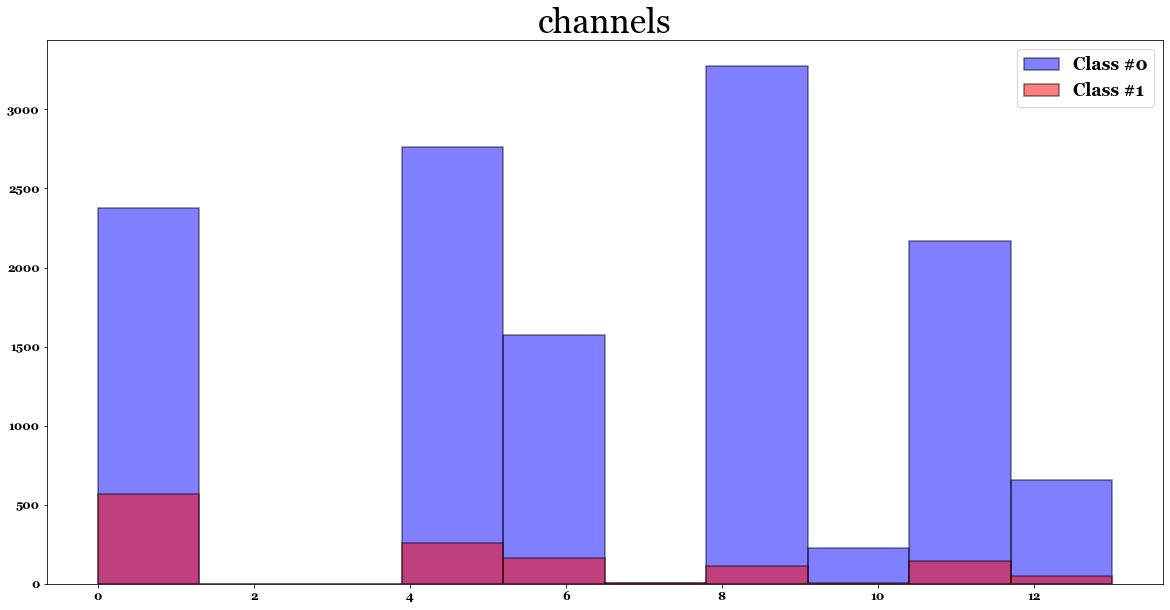

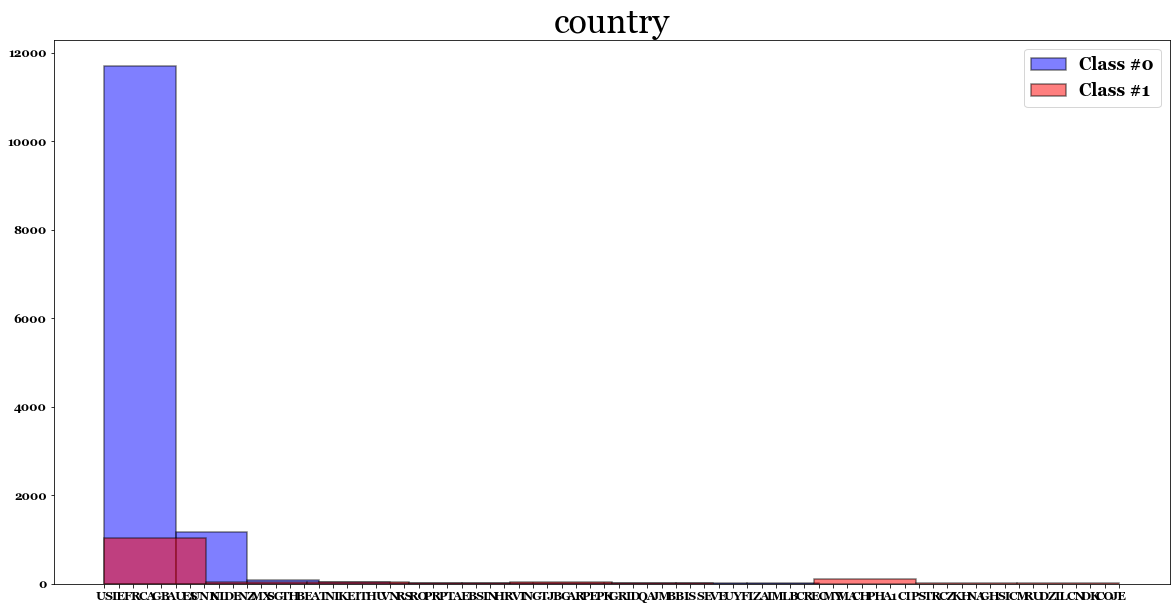

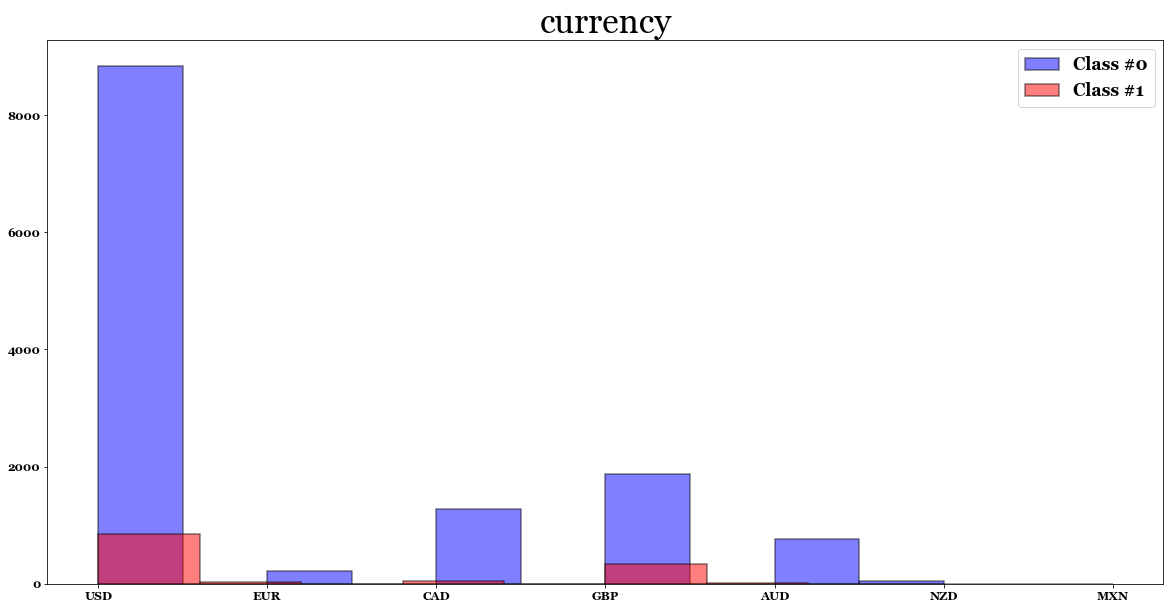

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


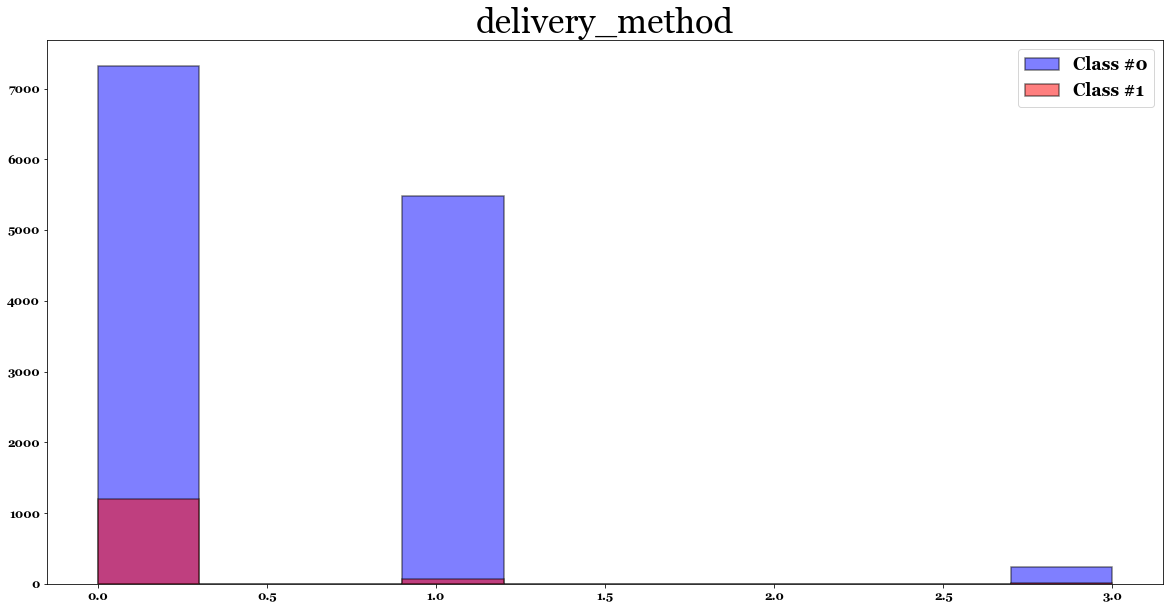

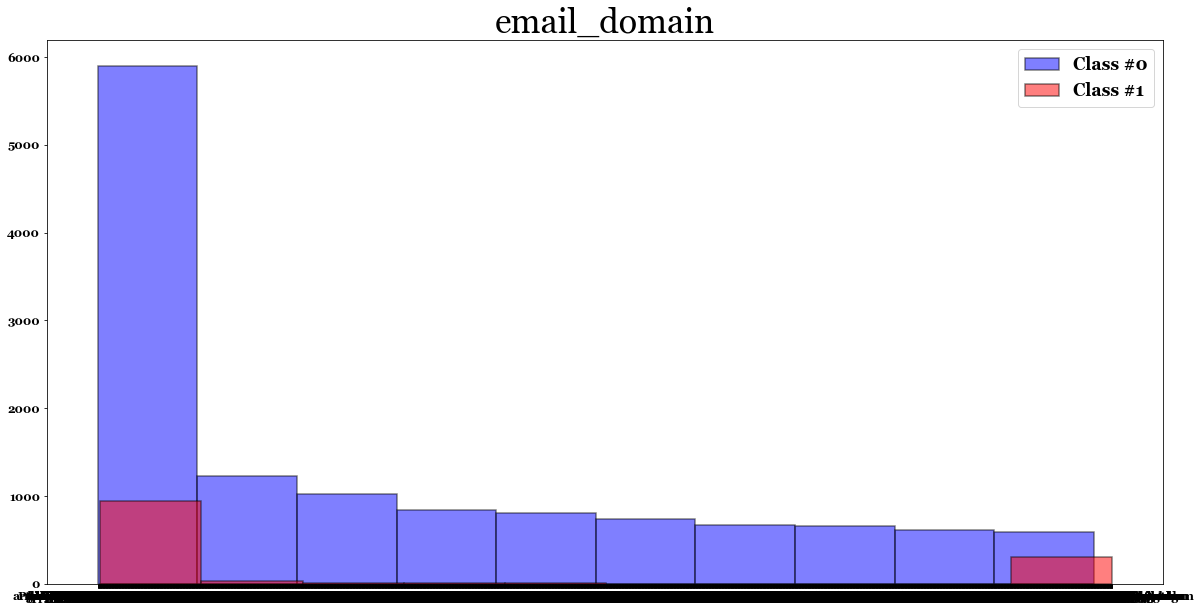

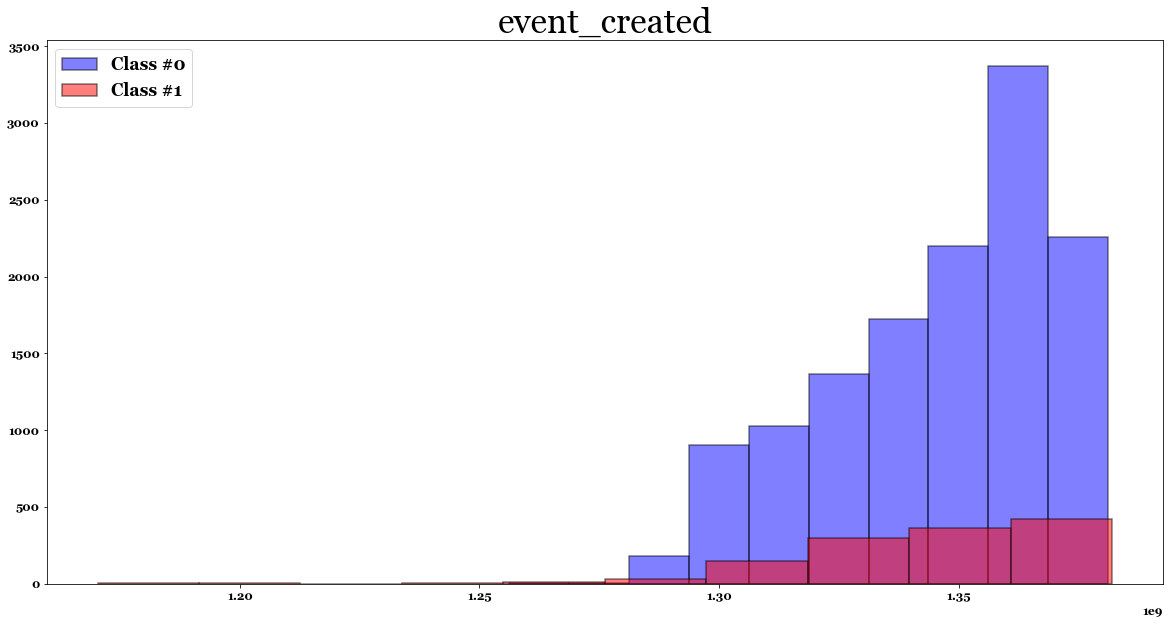

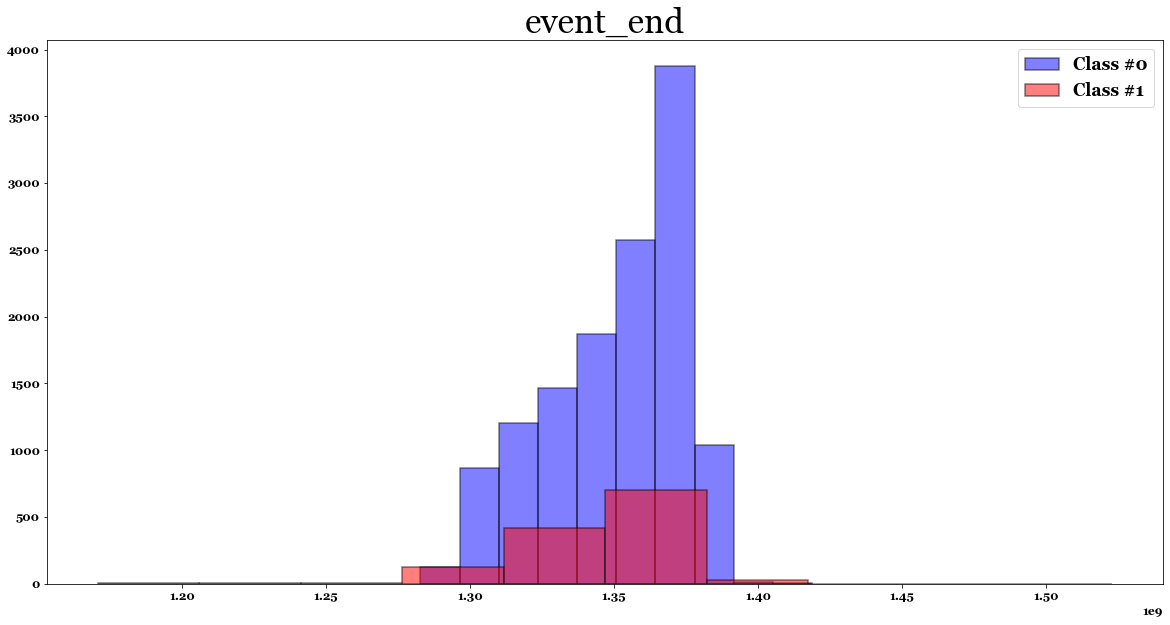

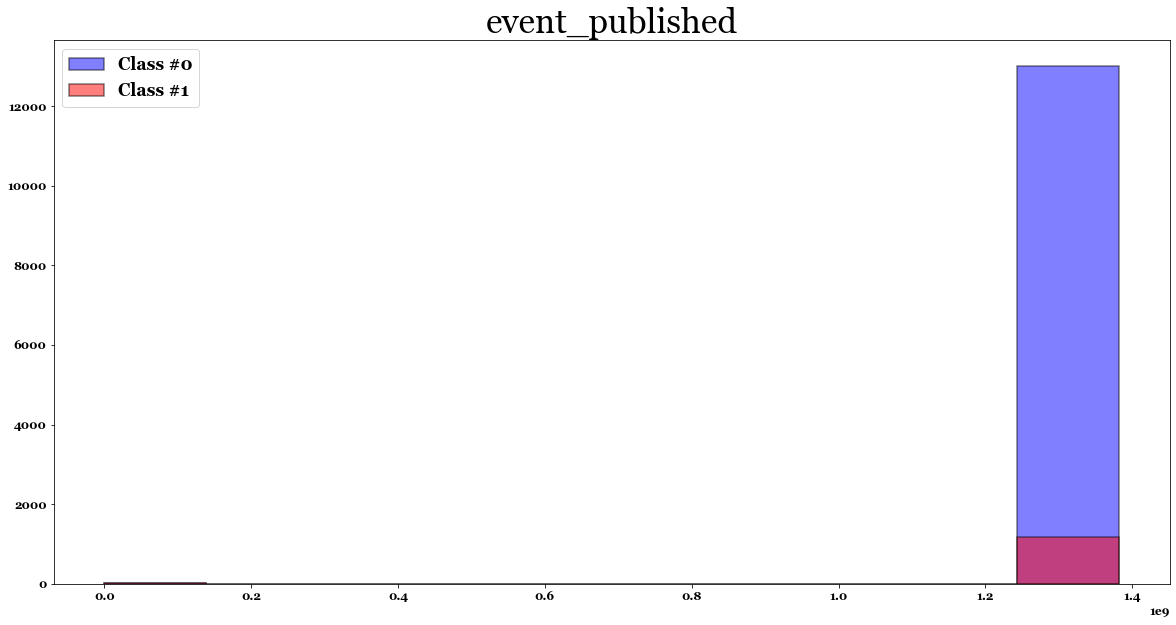

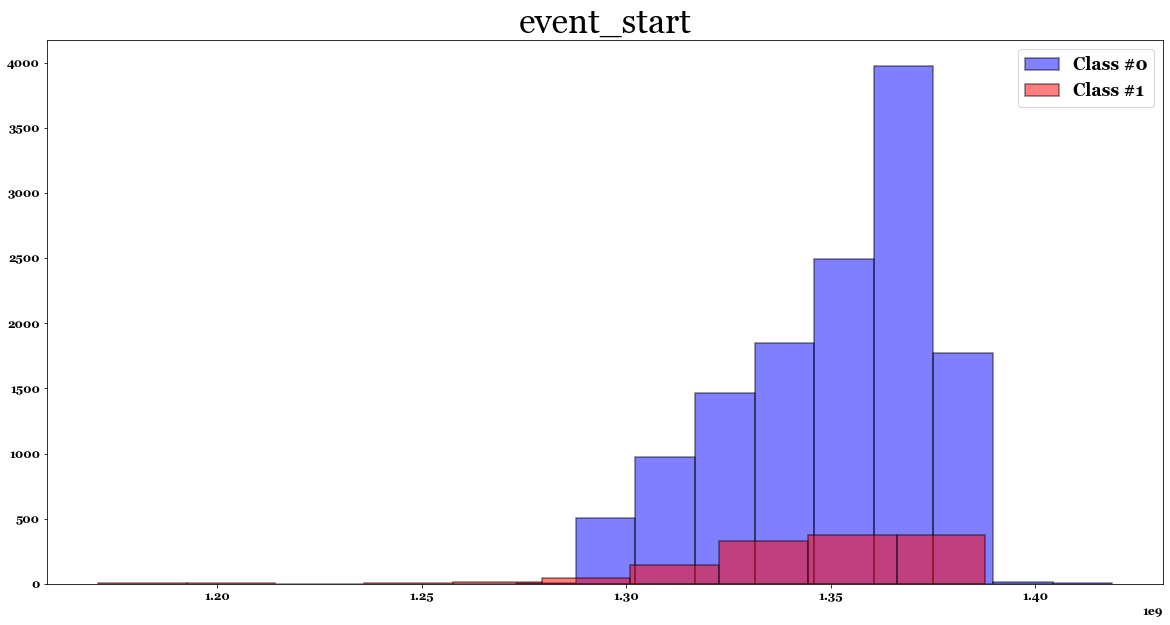

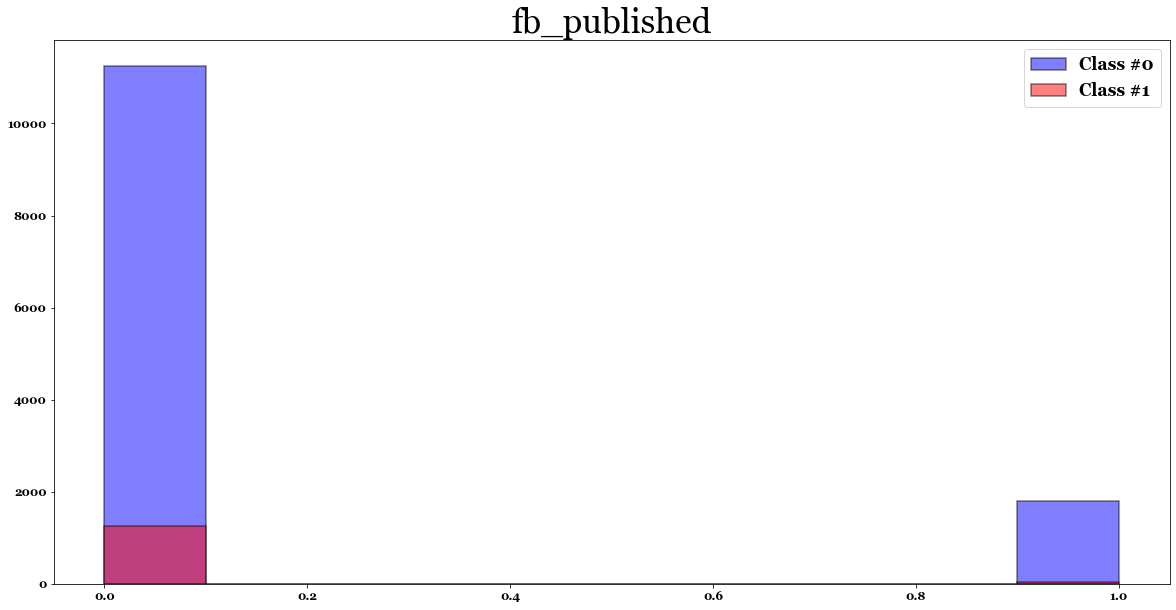

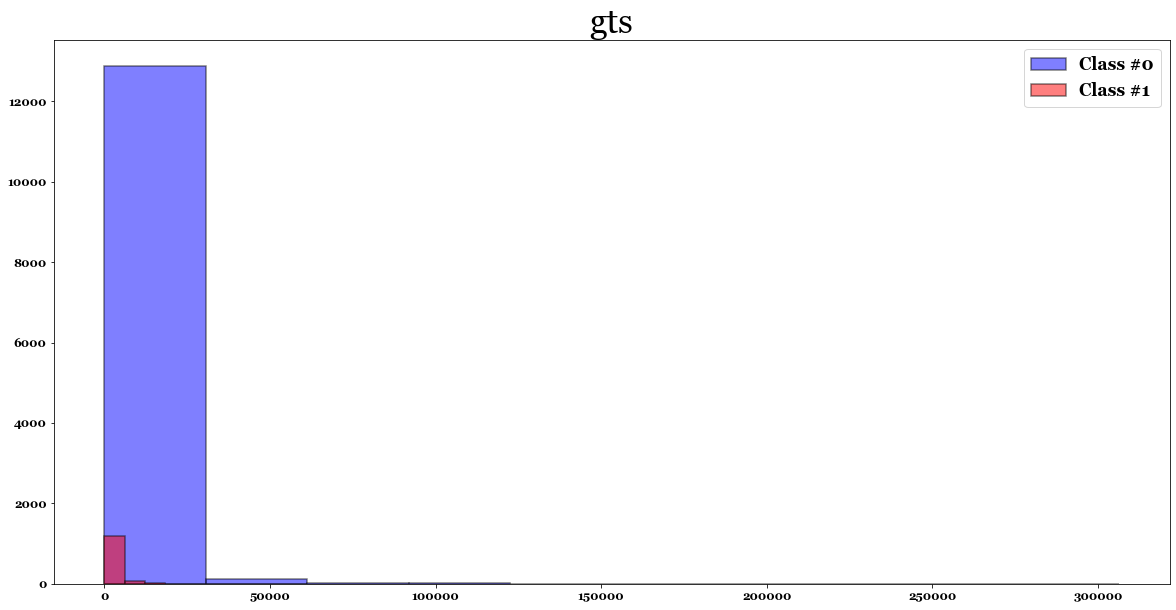

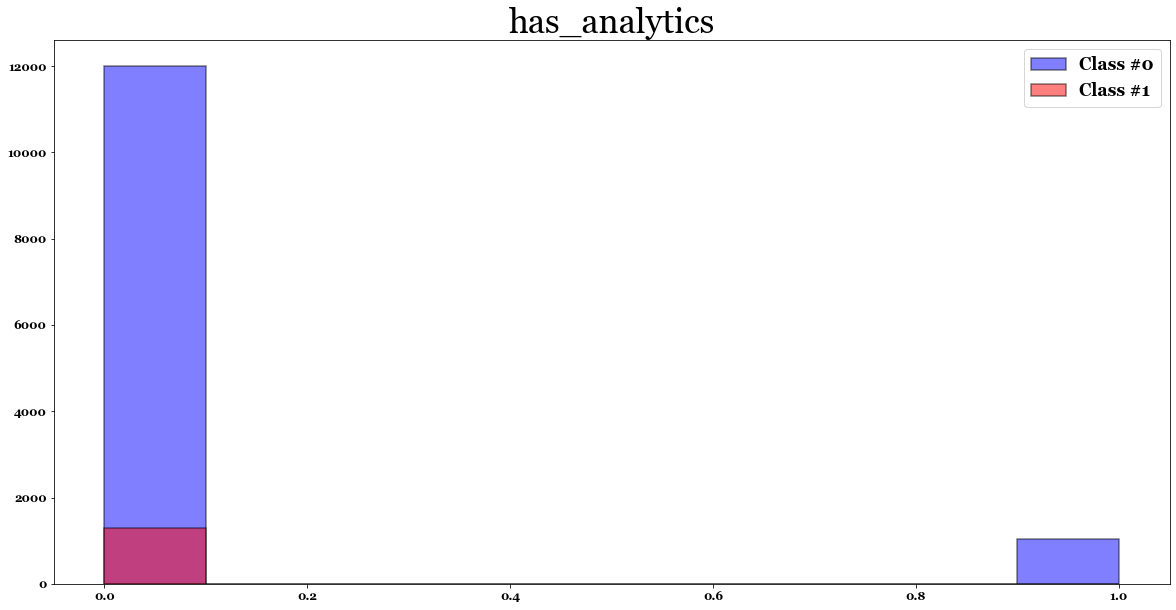

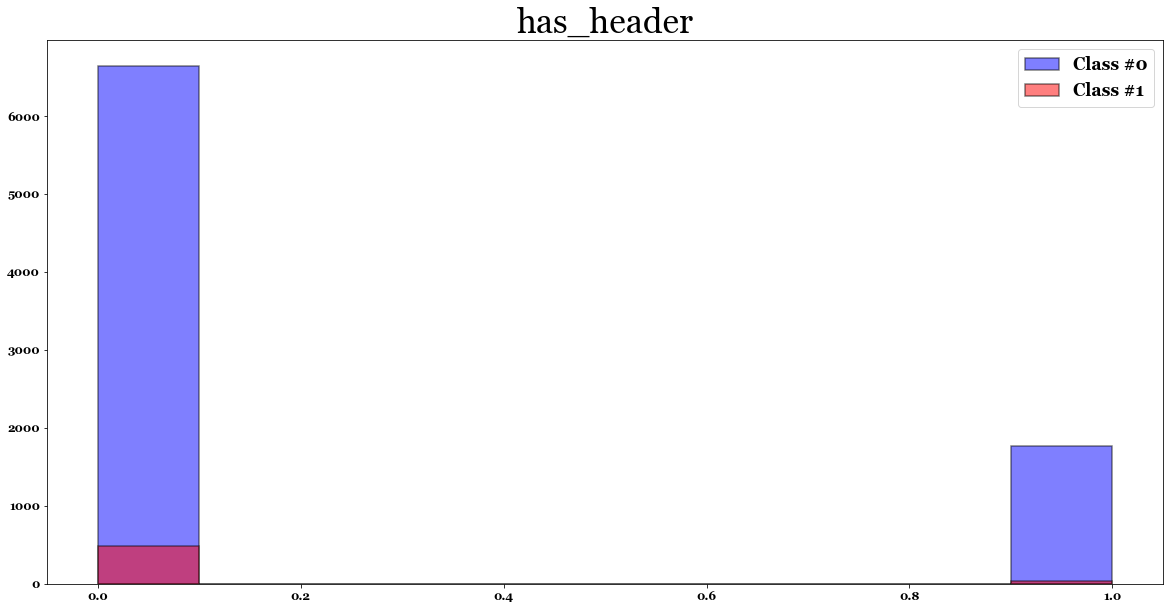

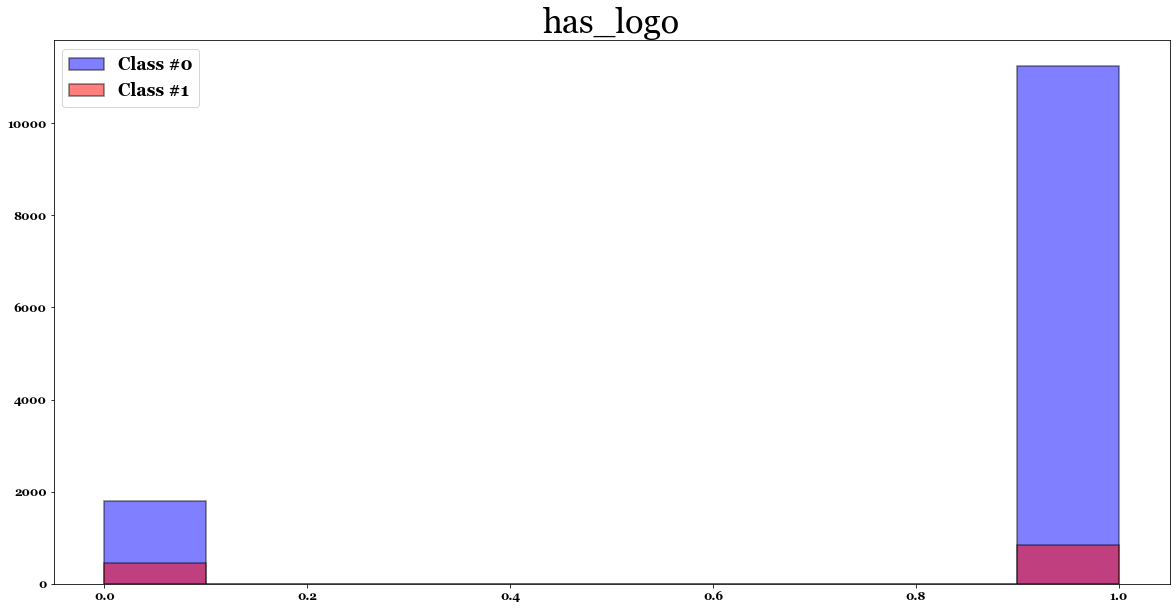

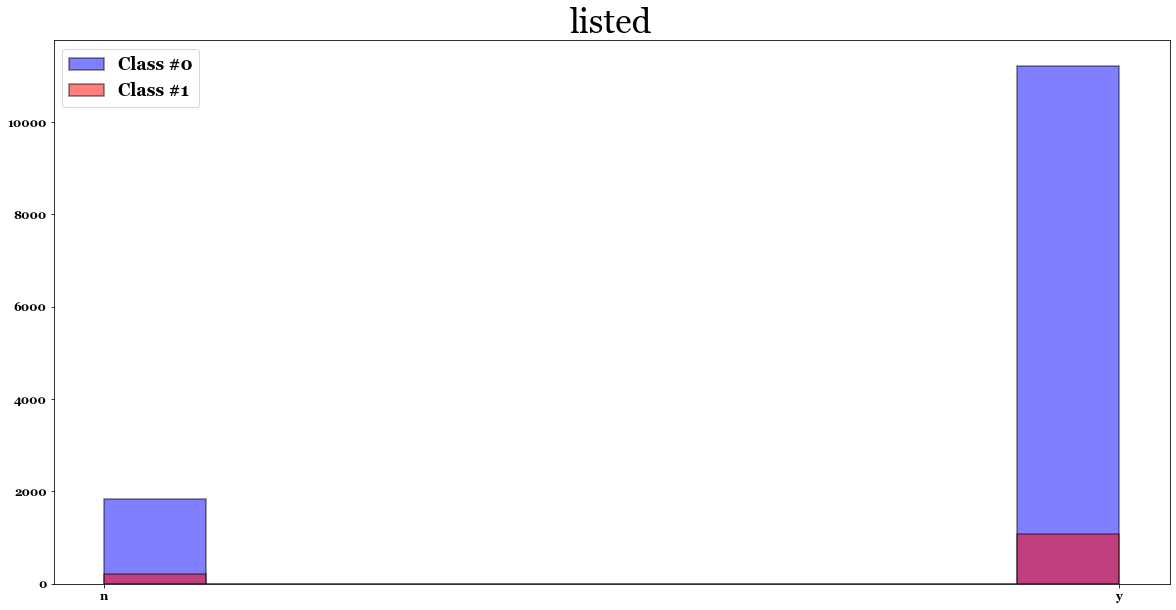

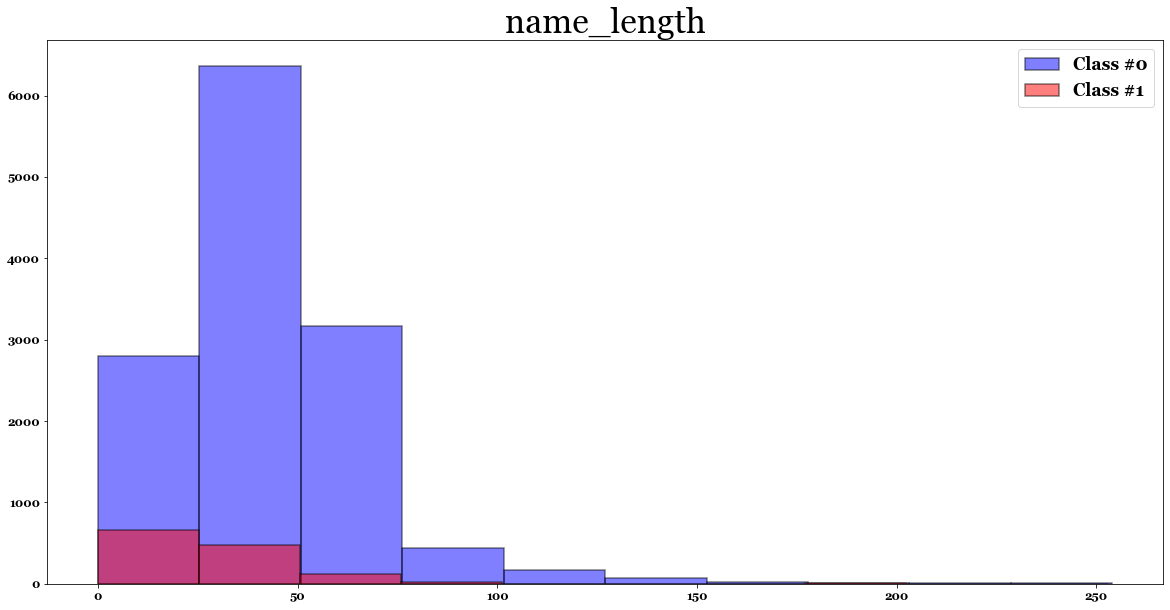

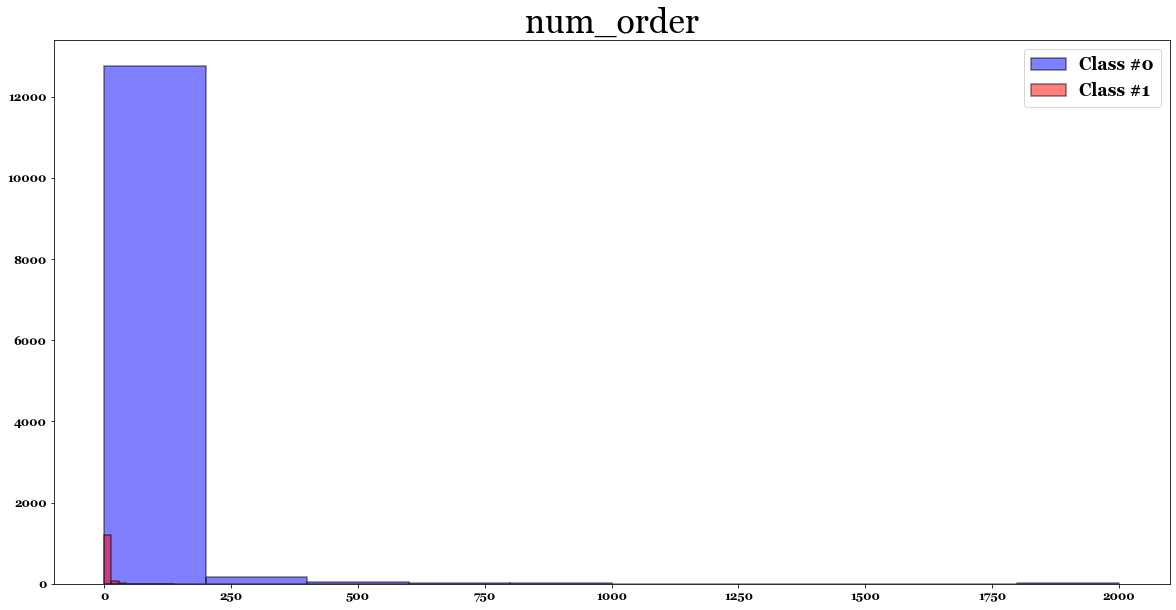

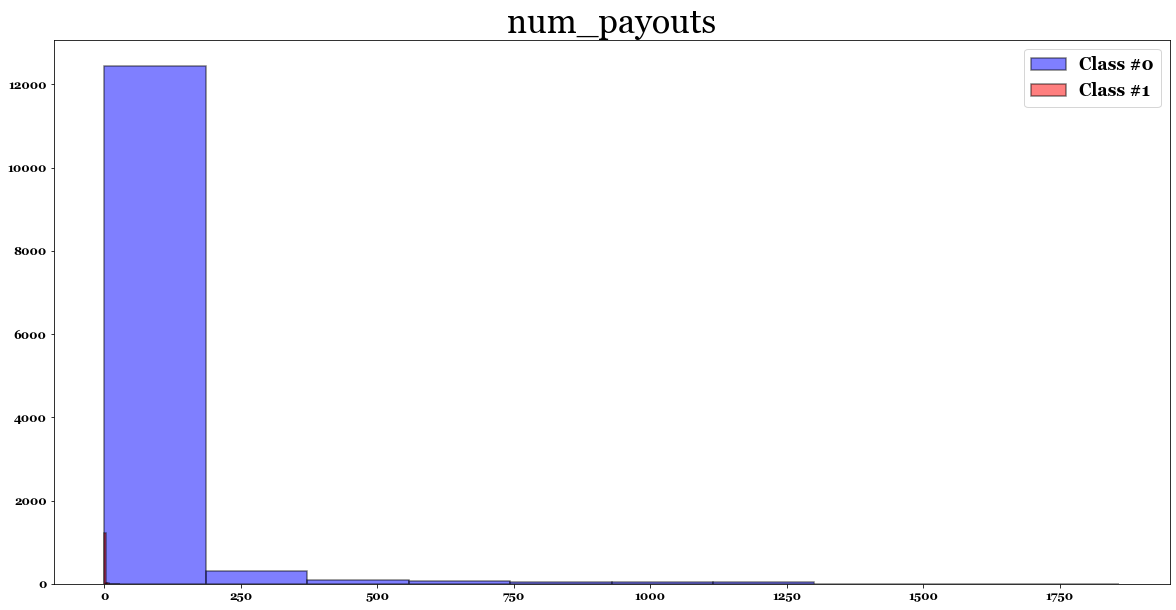

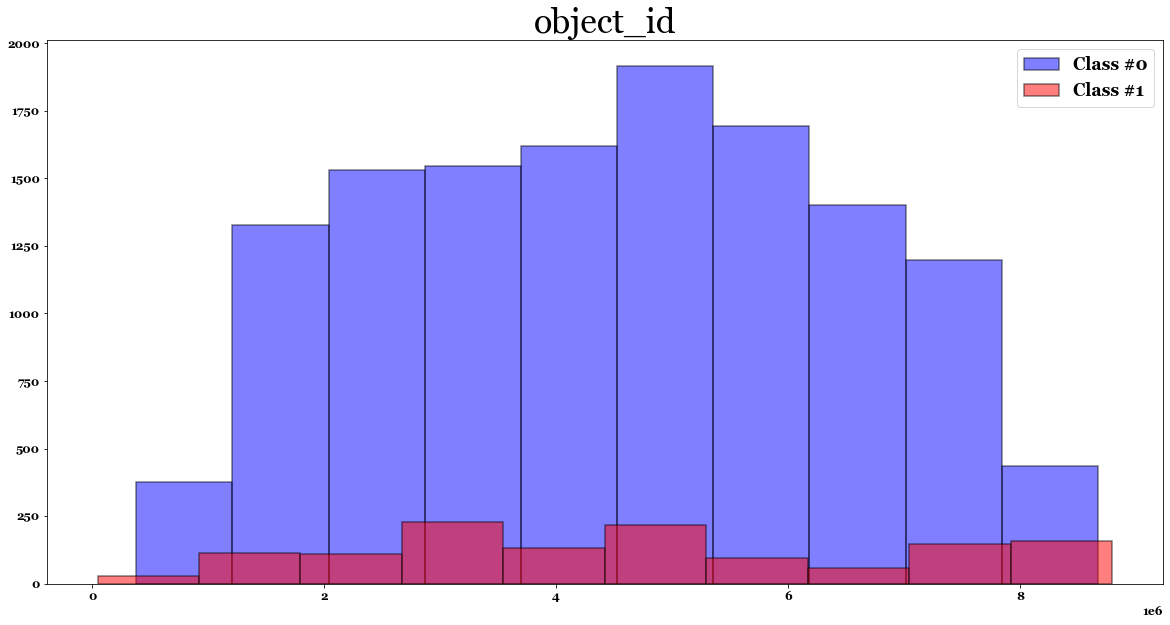

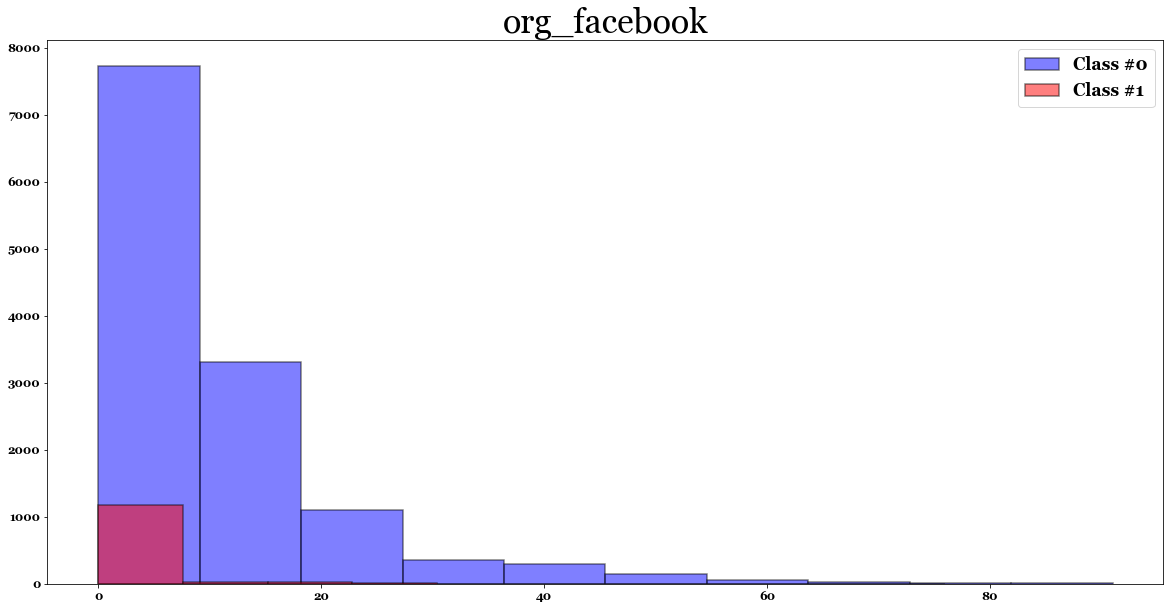

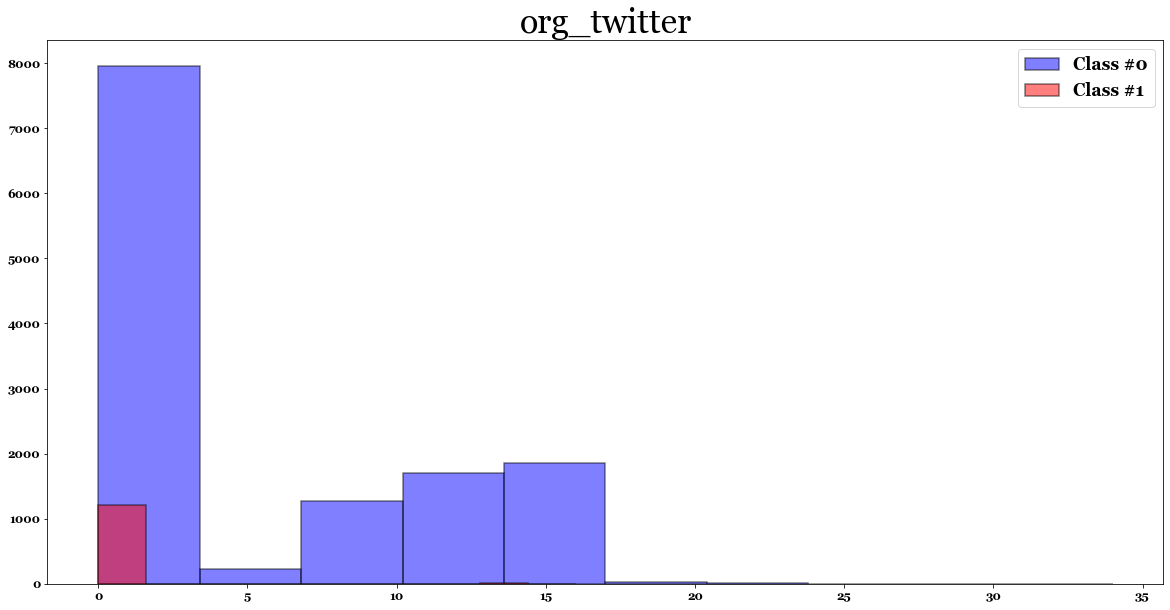

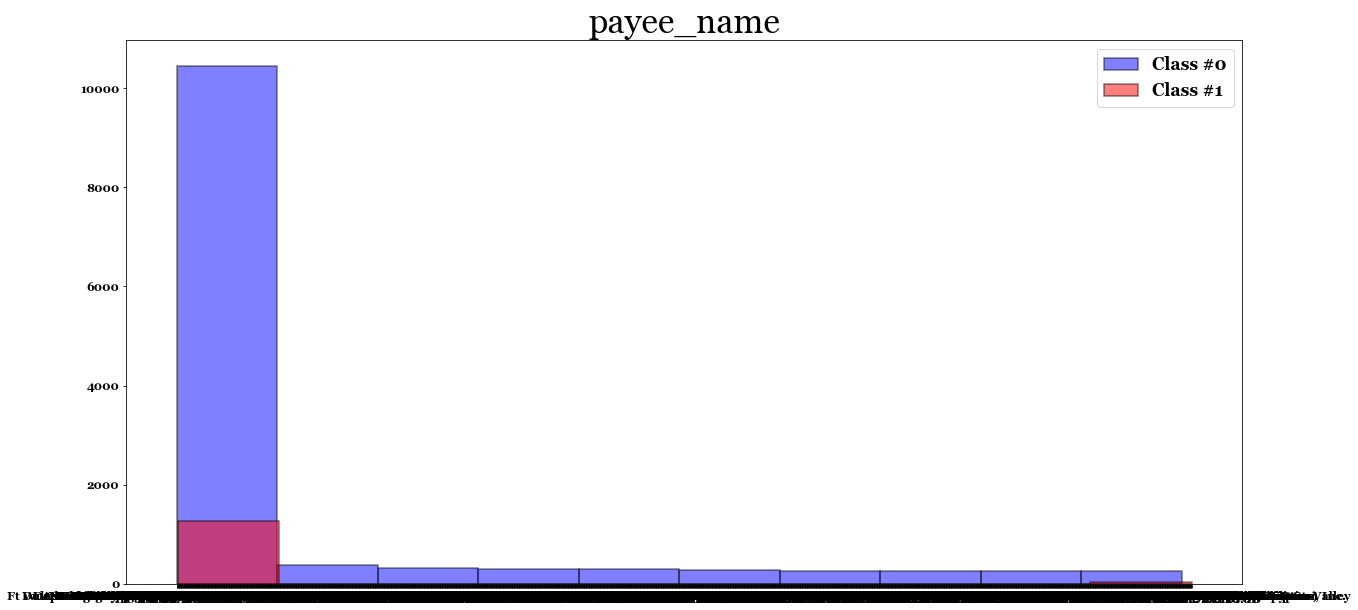

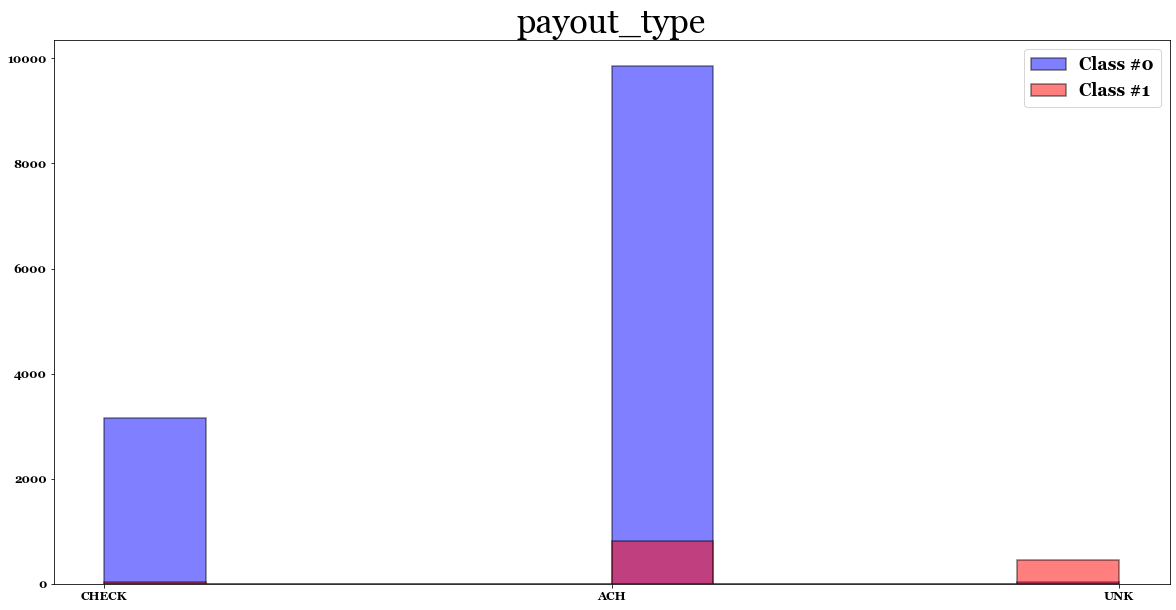

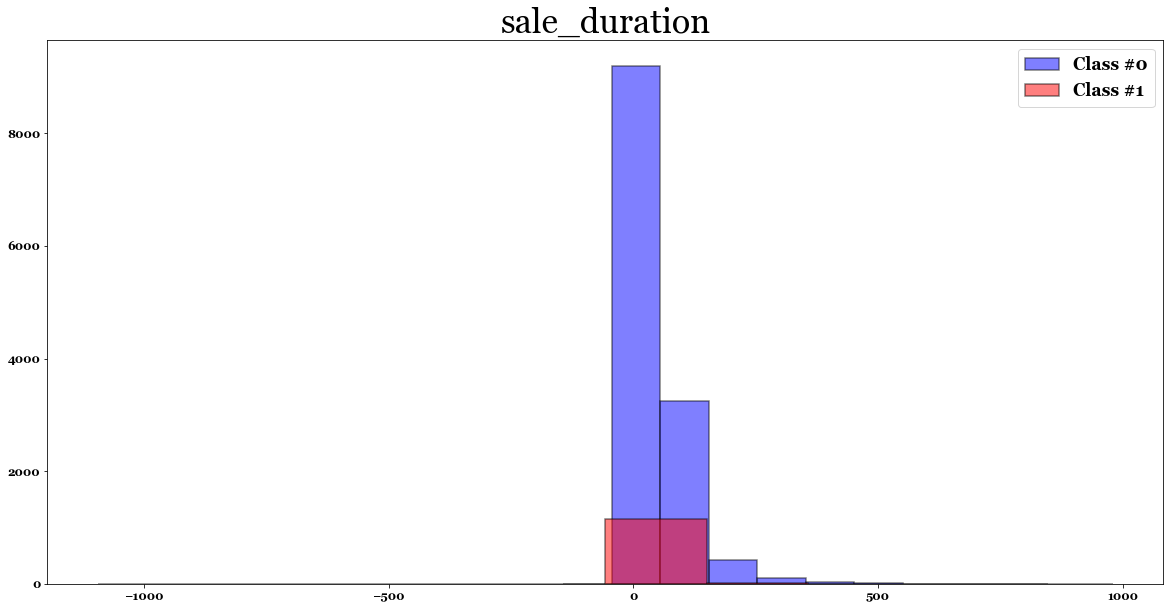

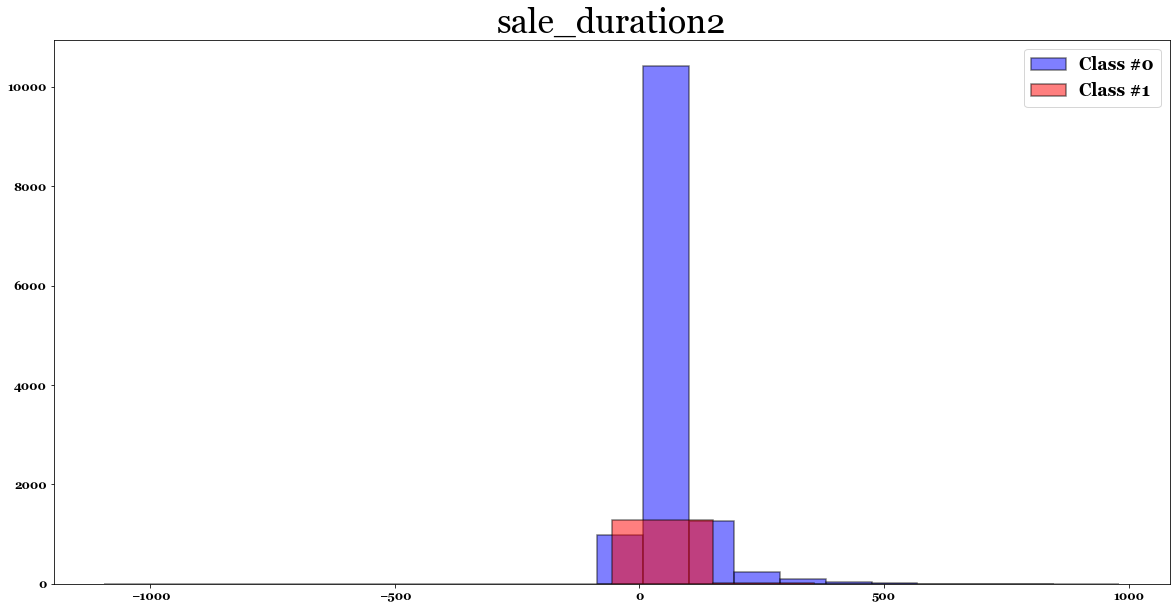

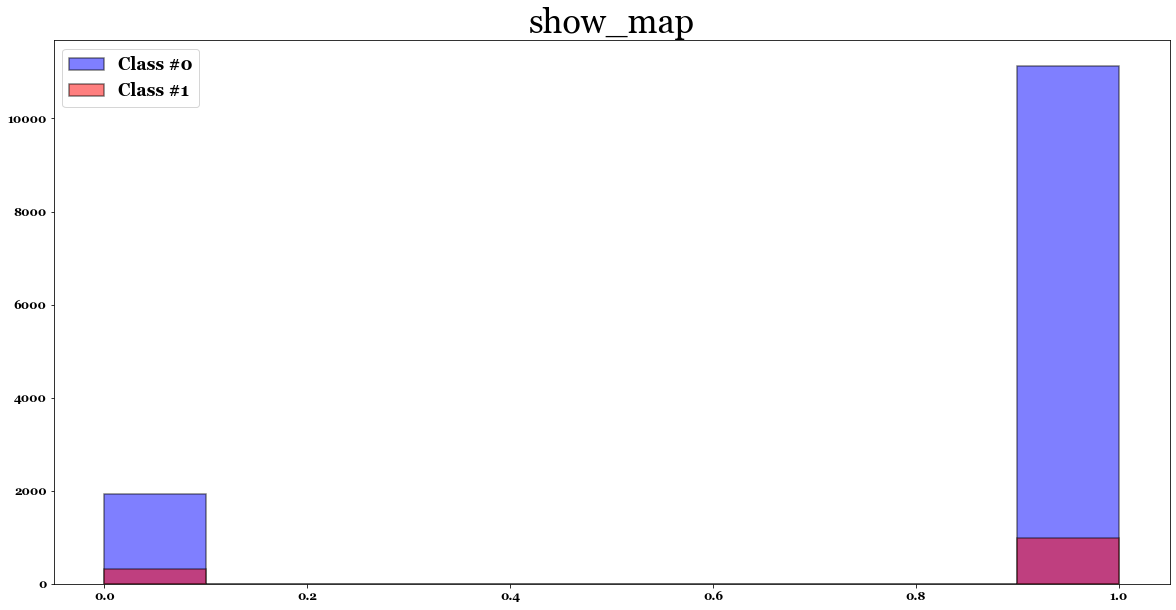

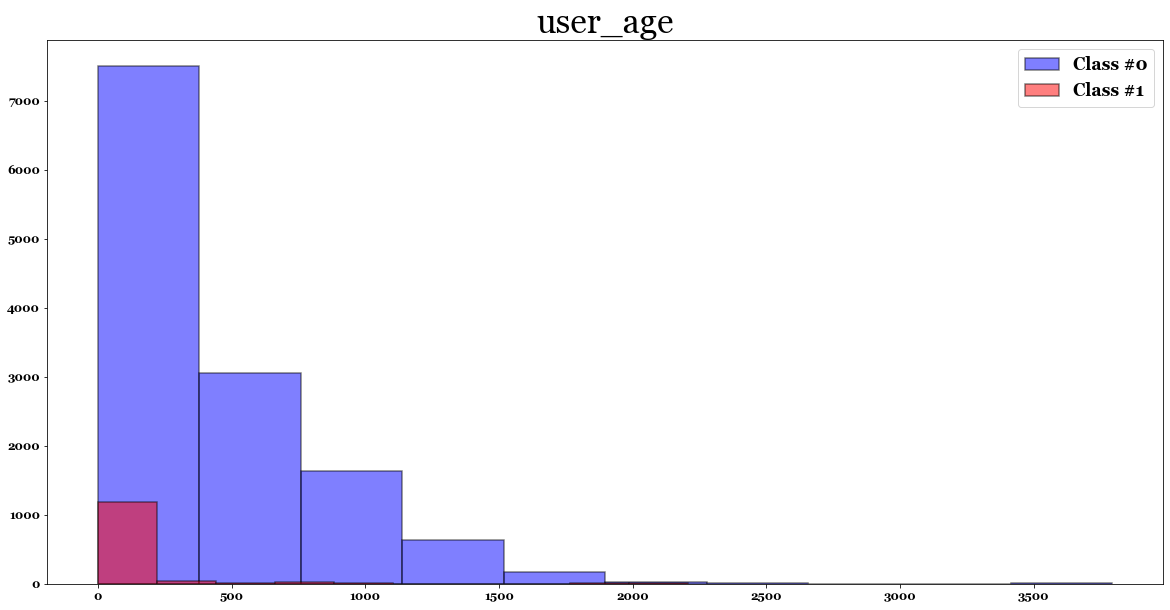

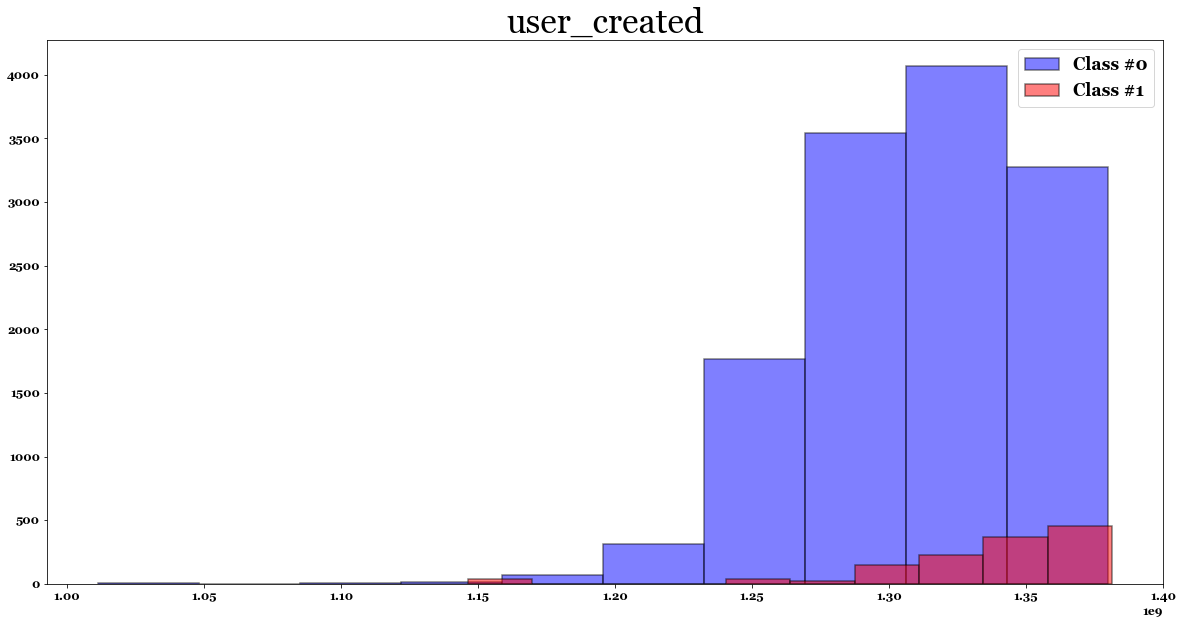

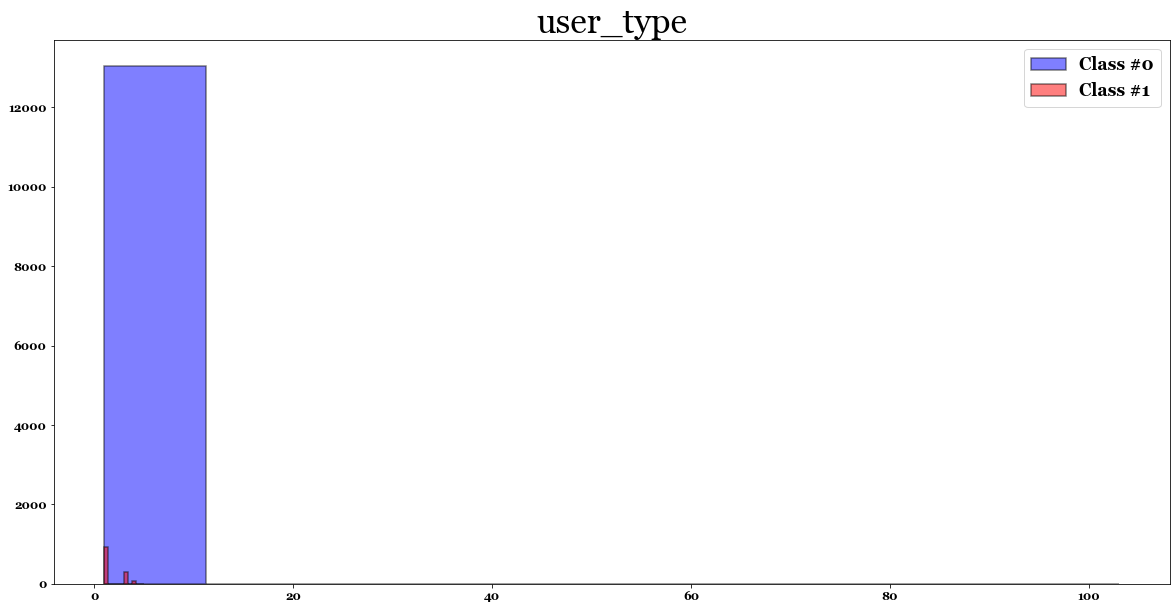

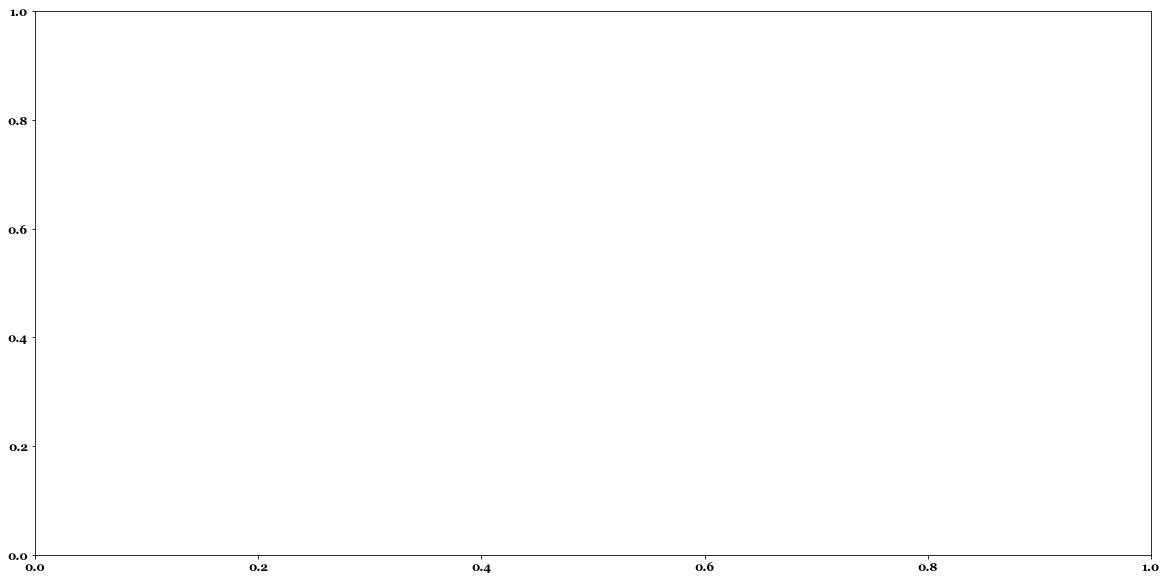

In [10]:
for col in cols:
    try:
        hist_plots(fraud, nonfraud, col)
    except TypeError:
        pass

#### **** Look at org name, previous payouts, any text based columns, ticket types, lat, long, venue address and name, separately ****

### Convert ticket_type column into Dataframe for analysis

In [183]:
pd.DataFrame(fraud.ticket_types[0])

,event_id,cost,availability,quantity_total,quantity_sold
0,527017,25.0,1,800,0
1,527017,50.0,1,100,0
2,527017,550.0,1,20,0


### Fraud conversion + analytsis

In [20]:
frame_list = []
for x in fraud.ticket_types.values:
    frame_list.append(pd.DataFrame(x))

In [21]:
fraud_ticket_types = pd.concat(frame_list)

In [22]:
frame_list = []
for x in nonfraud.ticket_types.values:
    frame_list.append(pd.DataFrame(x))

In [24]:
nonfraud_ticket_types = pd.concat(frame_list)

In [28]:
fraud_ticket_types.reset_index(drop=True, inplace=True)
nonfraud_ticket_types.reset_index(drop=True, inplace=True)

In [32]:
fraud_ticket_types.iloc[:, 1:].describe()
nonfraud_ticket_types.iloc[:, 1:].describe()

,cost,availability,quantity_total,quantity_sold
count,2237.000000,2237.000000,2237.000000,2237.000000
mean,303.790009,1.005364,32020.675458,2.358963
std,1217.938370,0.073061,121539.335407,13.468886
min,0.000000,1.000000,0.000000,0.000000
25%,20.000000,1.000000,16.000000,0.000000
50%,84.990000,1.000000,50.000000,0.000000
75%,249.000000,1.000000,200.000000,0.000000
max,25000.000000,2.000000,500000.000000,296.000000


,cost,availability,quantity_total,quantity_sold
count,36392.000000,36392.000000,36392.000000,36392.000000
mean,138.091798,1.050561,730.463591,26.456309
std,968.904638,0.219102,11188.863610,135.592463
min,-1.160000,1.000000,0.000000,0.000000
25%,10.000000,1.000000,20.000000,1.000000
50%,22.850000,1.000000,50.000000,4.000000
75%,69.720000,1.000000,121.000000,17.000000
max,100000.000000,2.000000,500000.000000,10606.000000


In [34]:
fraud_ticket_types['Label'] = 1

In [35]:
nonfraud_ticket_types['Label'] = 0

In [41]:
ticket_types = pd.concat([fraud_ticket_types, nonfraud_ticket_types]).reset_index(drop=True)

In [43]:
ticket_types.drop('event_id', axis=1, inplace=True)

In [48]:
ticket_types[ticket_types['Label'] == 1]['availability'].value_counts()

1    2225
2      12
Name: availability, dtype: int64

In [49]:
ticket_types[ticket_types['Label'] == 0]['availability'].value_counts()

1    34552
2     1840
Name: availability, dtype: int64

In [53]:
ticketx = ticket_types.iloc[:, :-1].values
tickety = ticket_types['Label'].values

In [56]:
trainx, testx, trainy, testy = train_test_split(ticketx, tickety, test_size=0.2, stratify=tickety)
trainx.shape, testx.shape, trainy.shape, testy.shape

((30903, 4), (7726, 4), (30903,), (7726,))

In [57]:
lr = LogisticRegression(n_jobs=-1, verbose=1)
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, verbose=1)

In [58]:
print(cross_val_score(lr, trainx, trainy, cv=10, scoring='f1', verbose=1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using ba

[0.17258883 0.09473684 0.10526316 0.16410256 0.0952381  0.12435233
 0.1443299  0.04347826 0.12435233 0.10416667]


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.0s finished


In [60]:
print(cross_val_score(rf, trainx, trainy, cv=5, scoring='f1', verbose=1, n_jobs=1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs

[0.42758621 0.4        0.39669421 0.37142857 0.39795918]


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s finished


In [62]:
pd.to_datetime(fraud['approx_payout_date'])

0       1970-01-01 00:00:01.266062400
26      1970-01-01 00:00:01.299607200
51      1970-01-01 00:00:01.329465600
54      1970-01-01 00:00:01.312761600
70      1970-01-01 00:00:01.322895600
                     ...             
14316   1970-01-01 00:00:01.360310400
14318   1970-01-01 00:00:01.359784800
14325   1970-01-01 00:00:01.360049400
14332   1970-01-01 00:00:01.361689200
14336   1970-01-01 00:00:01.363316400
Name: approx_payout_date, Length: 1293, dtype: datetime64[ns]

### Testing this line